In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import plotting_extent
from rasterio.warp import reproject, Resampling
from natsort import natsorted
import earthpy.spatial as es
import gdal
from osgeo import osr,gdal_array
import xarray as xr
import netCDF4
import pandas as pd
import numpy as np
import geopandas
import rasterio
import pycrs
import os

file_dir=r'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/venv/github_trait_geo_diverse_dl/trait-geo-diverse-dl/extended model extra observations and variables'

#### Part 1. Stacking Bioclim rasters
- open and stack the raster files

In [8]:
#BIOCLIM dataset
#create list of raster file locations and a list containing only the names of each raster
list_bioclim_files=[]
names_bioclim=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/wc5"):
    for file in files:
        if file.endswith('.tif') and "stacked" not in file:
            list_bioclim_files.append(file_dir+"/data/GIS/wc5/"+file)
            name=file.replace(".tif","")
            names_bioclim.append(name)
            names_bioclim=natsorted(names_bioclim,key=lambda y: y.lower())
print(names_bioclim)
#Stack ENVIREM dataset
#es.stack(list_envirem_files, file_dir+'/data/GIS/env_stacked/BIOCLIM_stacked.tif')  

['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19']


#### Part 2. Stacking ENVIREM rasters
- open and stack the raster files

In [9]:
#ENVIREM dataset
#create list of raster file locations and a list containing only the names of each raster
list_envirem_files=[]
names_envirem=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/5_deg"):
    for file in files:
        if file.endswith('.tif') and "stacked" not in file:
            list_envirem_files.append(file_dir+"/data/GIS/5_deg/"+file)
            name=file.replace(".tif","")
            names_envirem.append(name)
            names_envirem=natsorted(names_envirem,key=lambda y: y.lower())
print(names_envirem)
#Stack ENVIREM dataset
#es.stack(list_envirem_files, file_dir+'/data/GIS/env_stacked/ENVIREM_stacked.tif')

['Aspect_5deg', 'BulkDensity_5min', 'ClayPercentage_5min', 'current_5arcmin_annualPET', 'current_5arcmin_aridityIndexThornthwaite', 'current_5arcmin_climaticMoistureIndex', 'current_5arcmin_continentality', 'current_5arcmin_embergerQ', 'current_5arcmin_growingDegDays0', 'current_5arcmin_growingDegDays5', 'current_5arcmin_maxTempColdest', 'current_5arcmin_minTempWarmest', 'current_5arcmin_monthCountByTemp10', 'current_5arcmin_PETColdestQuarter', 'current_5arcmin_PETDriestQuarter', 'current_5arcmin_PETseasonality', 'current_5arcmin_PETWarmestQuarter', 'current_5arcmin_PETWettestQuarter', 'current_5arcmin_thermicityIndex', 'OrganicCarbon_5min', 'PhCaCL_5min', 'Slope_5deg']


#### Part 3. Stacking Soil rasters
- the rasters are not yet in the right resolution (5 deg) and therefore have to be resampled before stacking

In [ ]:
#source raster
source_raster=rasterio.open(file_dir+'/data/GIS/5_deg/Aspect_5deg.tif')
source_profile=source_raster.profile

#raster to adapt
infile=file_dir+'/data/GIS/historic_1_deg/Global_Biomass_1950-2010_1296/data/historical_global_1-degree_forest_biomass.nc4'
dataset=netCDF4.Dataset(infile)

variable_list=[]

for item in dataset.variables.keys():
    variable_list.append(item)
print(variable_list)

for item in dataset.variables.keys():
    print("variable %s"%item)
    try:
        with rasterio.open(r'NETCDF:'+file_dir+'/data/GIS/historic_1_deg/Global_Biomass_1950-2010_1296/data/historical_global_1-degree_forest_biomass.nc4:%s'%item) as src:
        # Register GDAL format drivers and configuration options with a
        # context manager.
            for i in range(1,14):
                print("band %s"%i)
                array=src.read(i)
                with rasterio.Env():

                    # Write an array as a raster band to a new 8-bit file. For
                    # the new file's profile, we start with the profile of the source
                    profile = source_profile

                    # And then change the band count to 1, set the
                    # dtype to uint8, and specify LZW compression.

                    with rasterio.open(file_dir+'/data/GIS/historic_1_deg/{}_{}.tif'.format(item,i), 'w', **profile) as dst:
                        dst.write(array.astype(rasterio.float32), 1)

            # At the end of the ``with rasterio.Env()`` block, context
            # manager exits and all drivers are de-registered.
    except:
        pass

In [10]:
list_historic_files=[]
names_historic=[]

##stack the rasters
for root, dirs, files in os.walk(file_dir+"/data/GIS/historic_1_deg"):
    for file in files:
        if file.endswith('.tif') and "time" not in file and "stacked" not in file:
            list_historic_files.append(file_dir+"/data/GIS/historic_1_deg/"+file)
            name=file.replace(".tif","")
            names_historic.append(name)
  
print(names_historic)
#es.stack(list_historic_files, file_dir+"/data/GIS/historic_1_deg/historic_forest_stacked.tif")

['AboveGroundBiomass_1', 'AboveGroundBiomass_10', 'AboveGroundBiomass_11', 'AboveGroundBiomass_12', 'AboveGroundBiomass_13', 'AboveGroundBiomass_2', 'AboveGroundBiomass_3', 'AboveGroundBiomass_4', 'AboveGroundBiomass_5', 'AboveGroundBiomass_6', 'AboveGroundBiomass_7', 'AboveGroundBiomass_8', 'AboveGroundBiomass_9', 'AGB_ha_1', 'AGB_ha_10', 'AGB_ha_11', 'AGB_ha_12', 'AGB_ha_13', 'AGB_ha_2', 'AGB_ha_3', 'AGB_ha_4', 'AGB_ha_5', 'AGB_ha_6', 'AGB_ha_7', 'AGB_ha_8', 'AGB_ha_9', 'area_1', 'area_10', 'area_11', 'area_12', 'area_13', 'area_2', 'area_3', 'area_4', 'area_5', 'area_6', 'area_7', 'area_8', 'area_9', 'BrBCEF_1', 'BrBCEF_10', 'BrBCEF_11', 'BrBCEF_12', 'BrBCEF_13', 'BrBCEF_2', 'BrBCEF_3', 'BrBCEF_4', 'BrBCEF_5', 'BrBCEF_6', 'BrBCEF_7', 'BrBCEF_8', 'BrBCEF_9', 'ConBCEF_1', 'ConBCEF_10', 'ConBCEF_11', 'ConBCEF_12', 'ConBCEF_13', 'ConBCEF_2', 'ConBCEF_3', 'ConBCEF_4', 'ConBCEF_5', 'ConBCEF_6', 'ConBCEF_7', 'ConBCEF_8', 'ConBCEF_9', 'ConiferShare_1', 'ConiferShare_10', 'ConiferShare_11', 

#### Part 4. Creating and stacking species occurrence rasters
- we make a copy of one of a single layered raster from the envirem dataset
- then all cell values are set to 0
- next the cell's in which occurrence records are located are identified and their values set to 1

In [3]:
#access file with list of taxa names
taxa=pd.read_csv(file_dir+"/data/SQL_filtered_gbif/taxa_list.txt",header=None)
taxa.columns=["taxon"]

species_occ_dict={}

for i in taxa["taxon"]:
    taxon_data = pd.read_csv(file_dir+"/data/SQL_filtered_gbif/%s_filtered_data.csv"%i)
    #add species dataframe to dict
    species_occ_dict["%s"%i] = taxon_data  
    #check whether all species have been included and inspect dictionary
if len(species_occ_dict.keys())==len(taxa["taxon"]):
    print("All species dataframes now in dictionary")
else:
    print("Error: not all species dataframe included")

All species dataframes now in dictionary


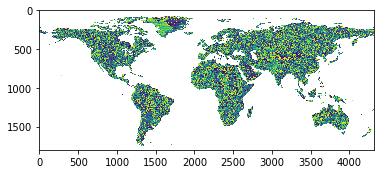

Text(0.5, 1.0, 'land map')

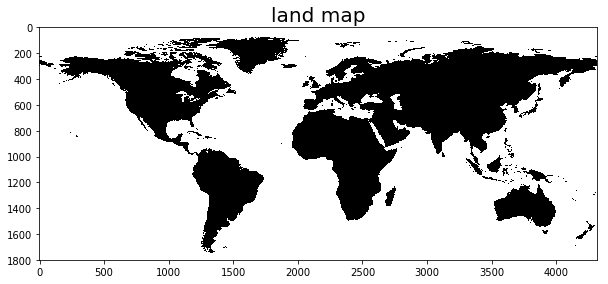

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [6]:
pred_data=pd.read_csv(file_dir+'/data/GIS/world_locations_to_predict.csv')

long=pred_data["decimal_longitude"]
lati=pred_data["decimal_latitude"]
long=pd.Series.tolist(long)
lati=pd.Series.tolist(lati)

src = rasterio.open(file_dir+'/data/GIS/5_deg/Aspect_5deg.tif')
band= src.read(1,masked=True)
rasterio.plot.show(band)

new_band = band.copy()

#set raster cell mask values of land area to 1 (to differentiate it from the sea)
for i in range(0,len(pred_data)):
    row,col=src.index(long[i],lati[i])
    new_band[row,col]=0

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(new_band,cmap="gray")
ax.set_title("land map",
         fontsize=20)
plt.show()



profile = src.profile
print(profile)

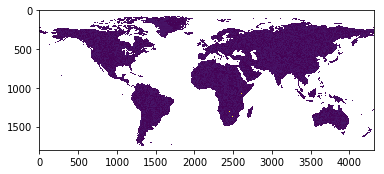

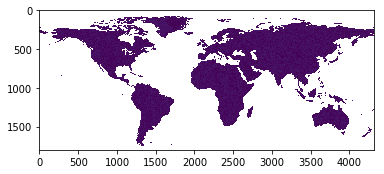

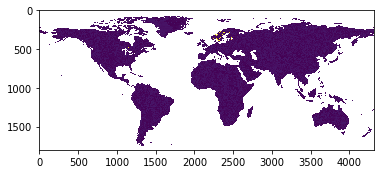

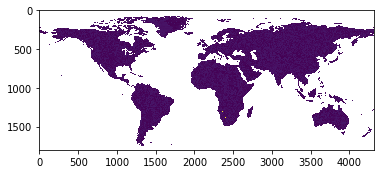

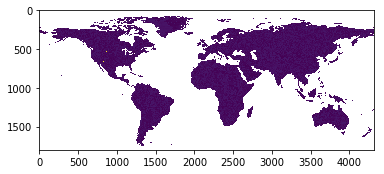

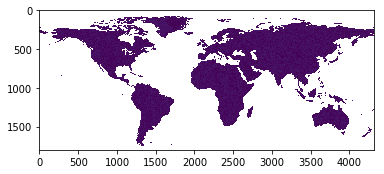

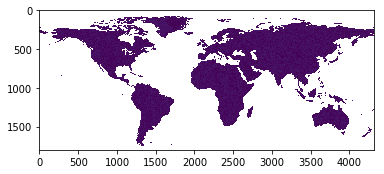

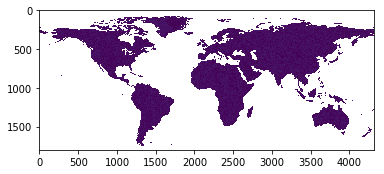

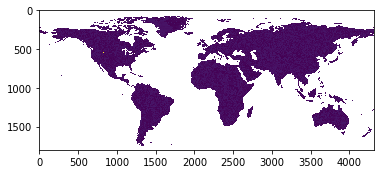

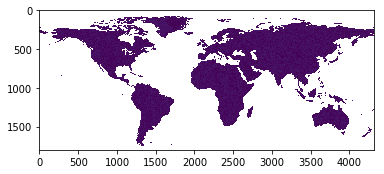

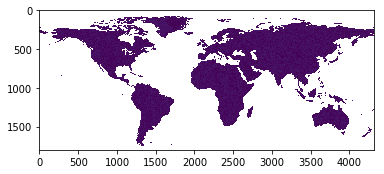

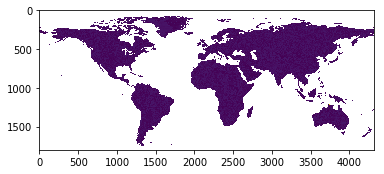

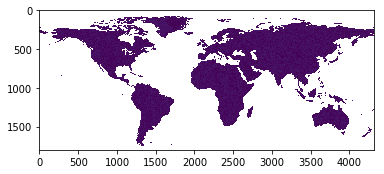

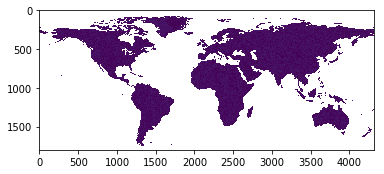

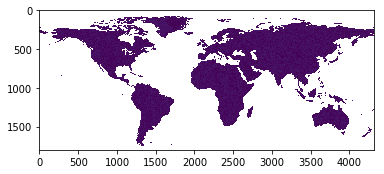

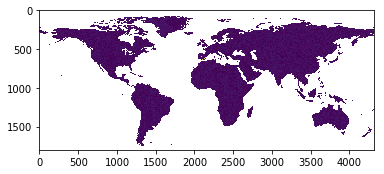

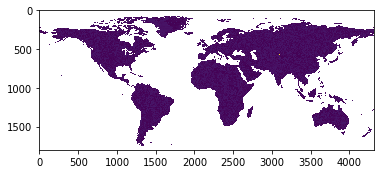

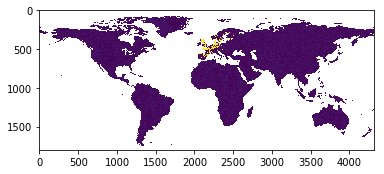

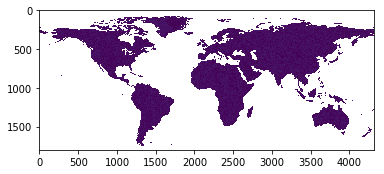

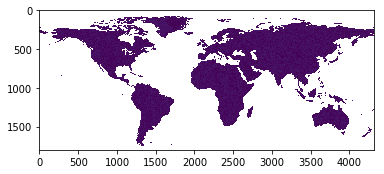

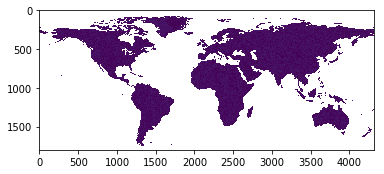

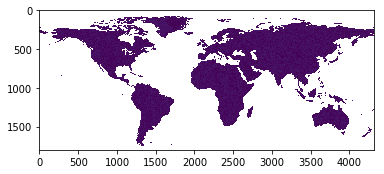

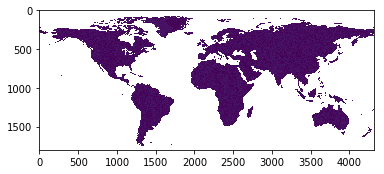

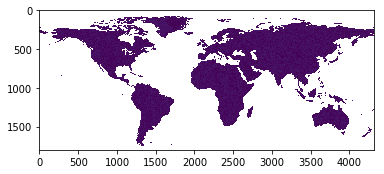

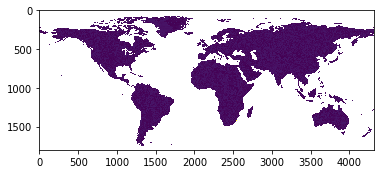

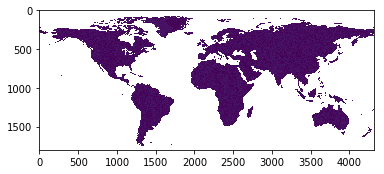

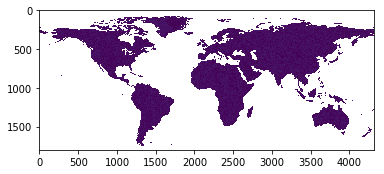

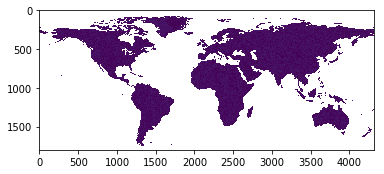

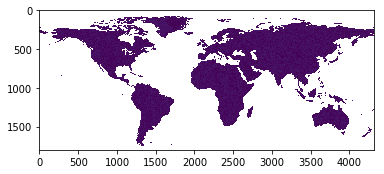

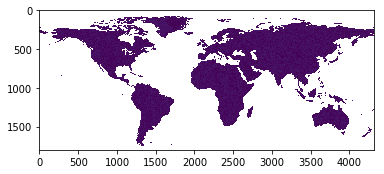

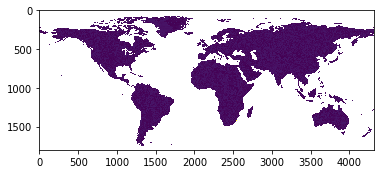

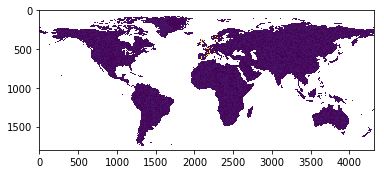

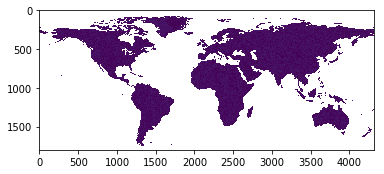

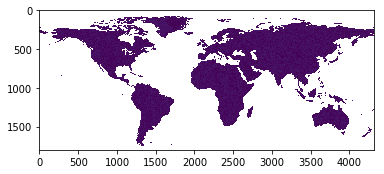

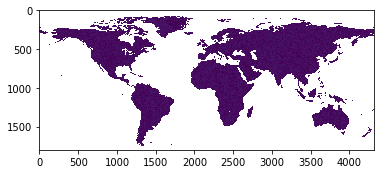

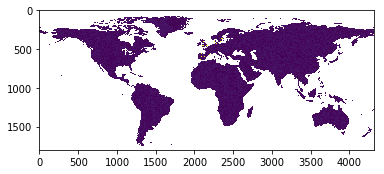

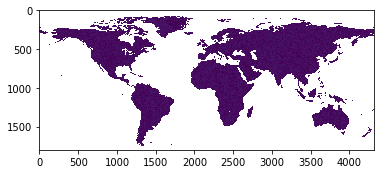

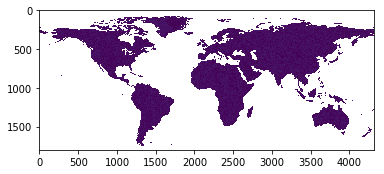

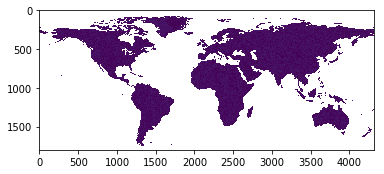

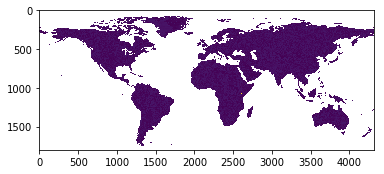

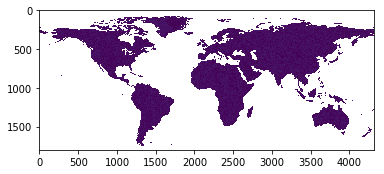

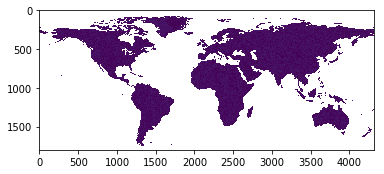

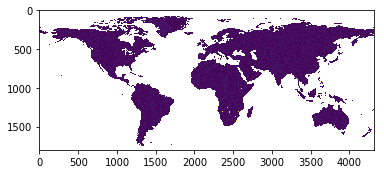

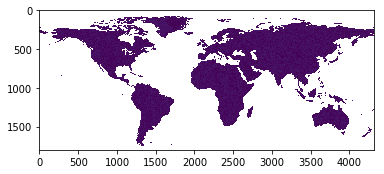

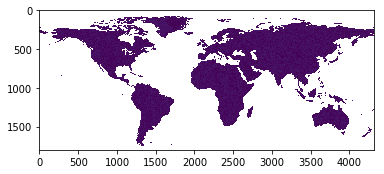

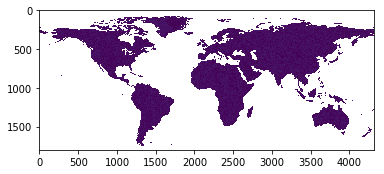

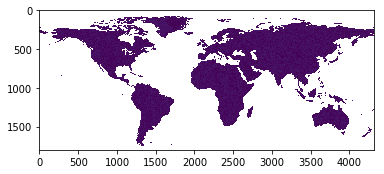

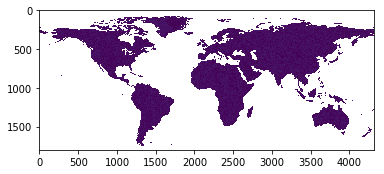

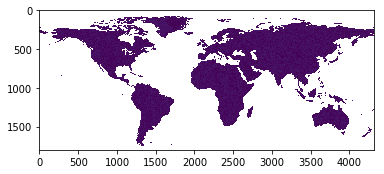

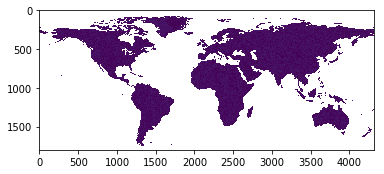

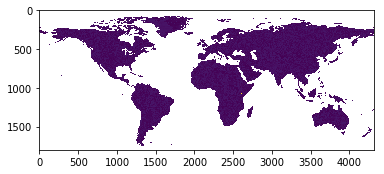

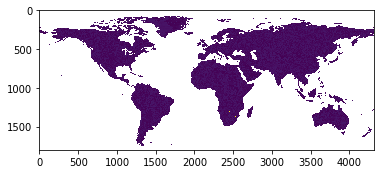

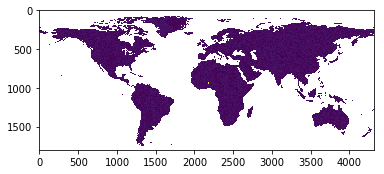

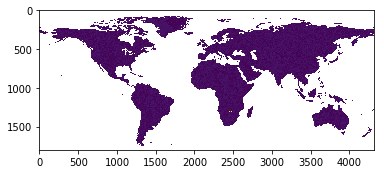

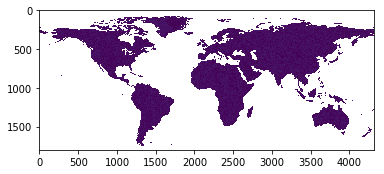

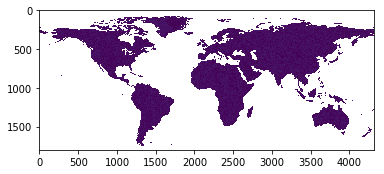

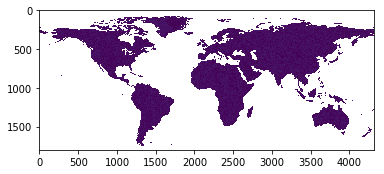

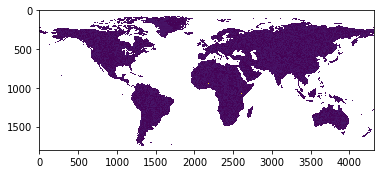

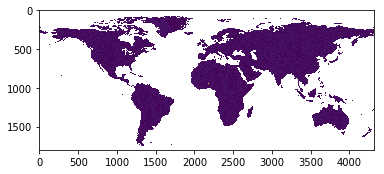

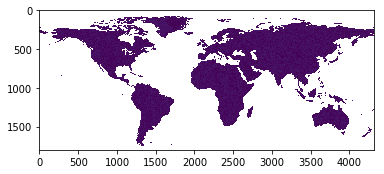

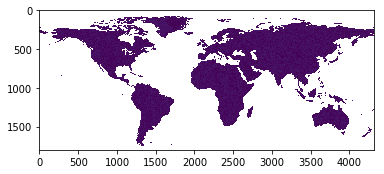

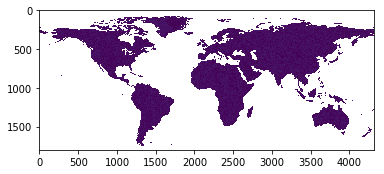

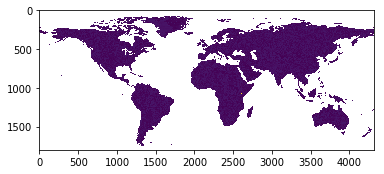

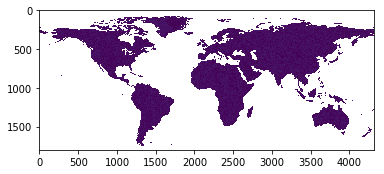

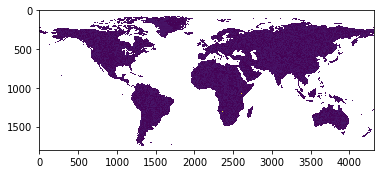

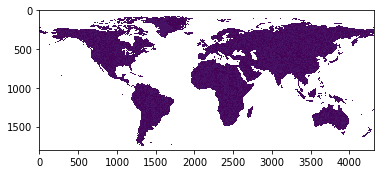

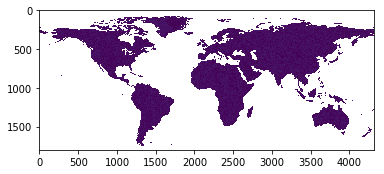

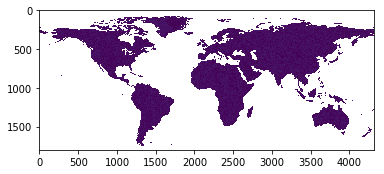

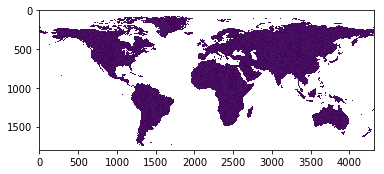

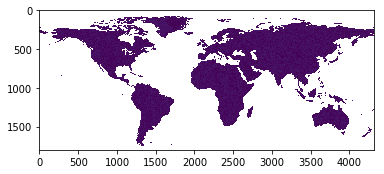

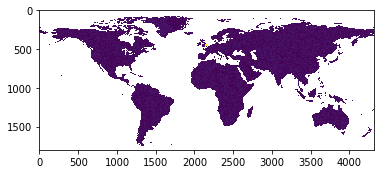

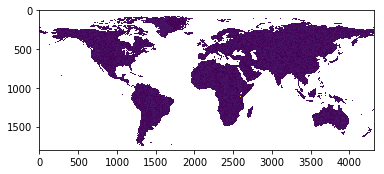

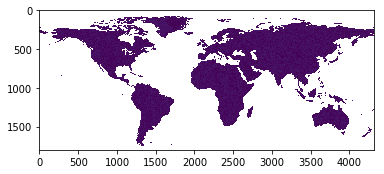

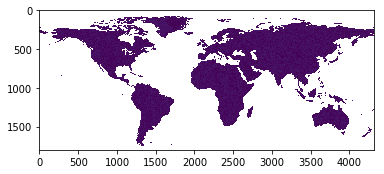

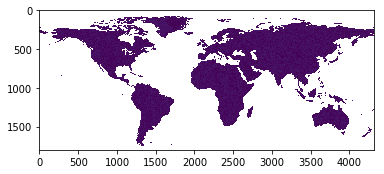

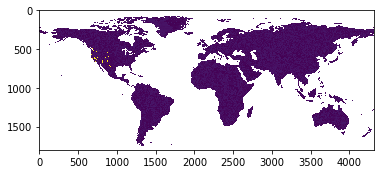

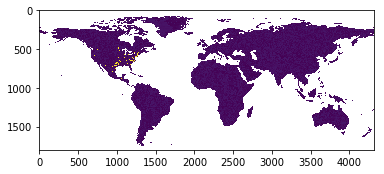

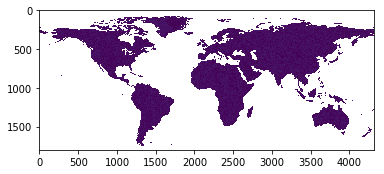

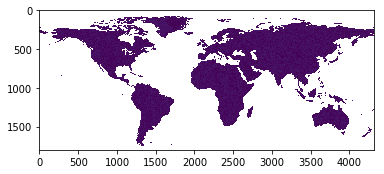

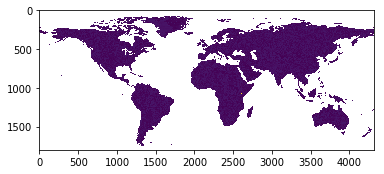

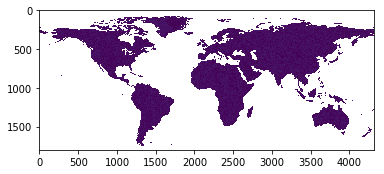

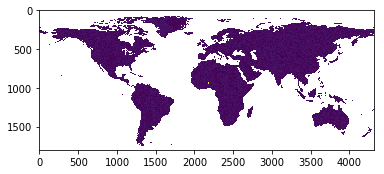

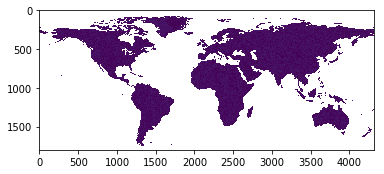

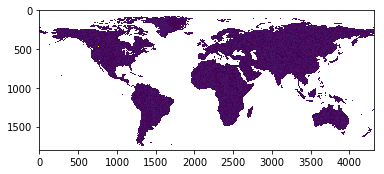

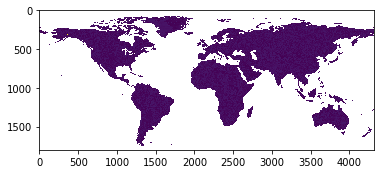

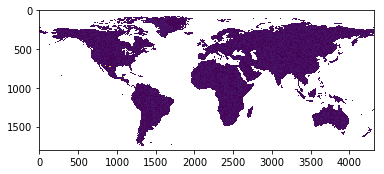

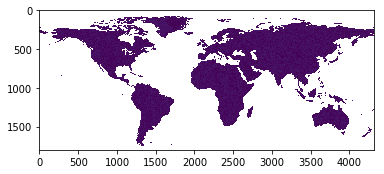

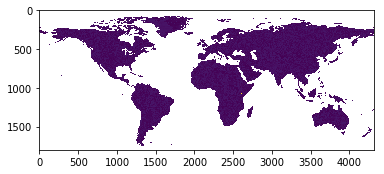

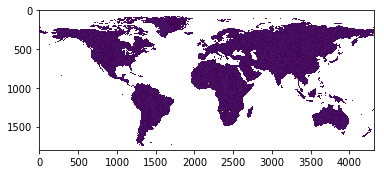

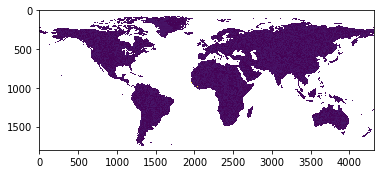

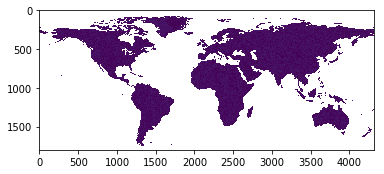

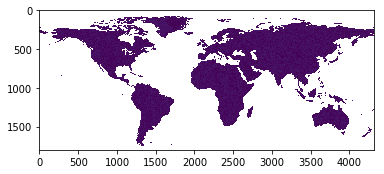

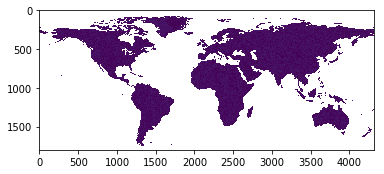

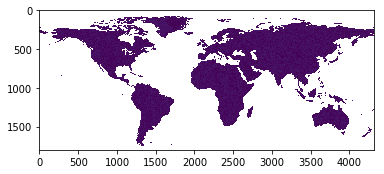

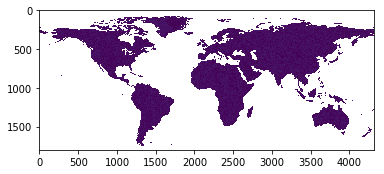

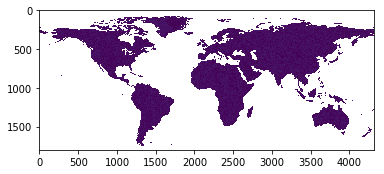

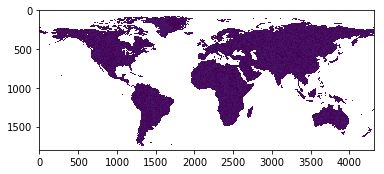

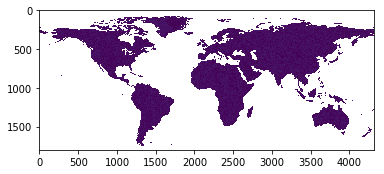

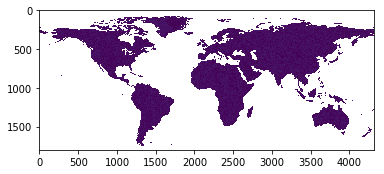

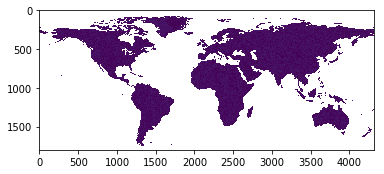

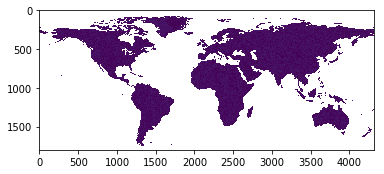

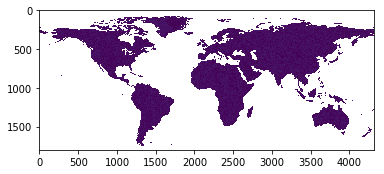

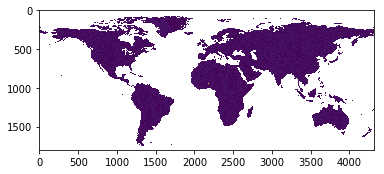

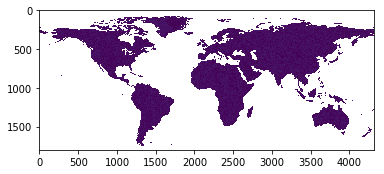

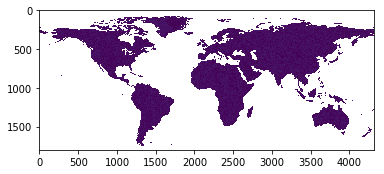

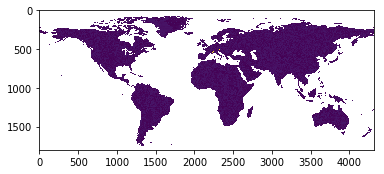

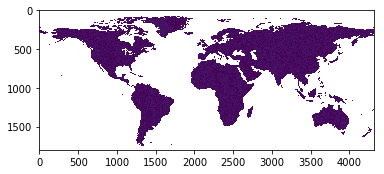

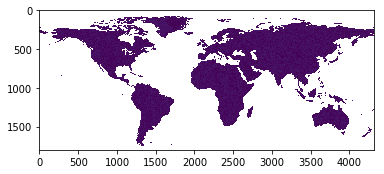

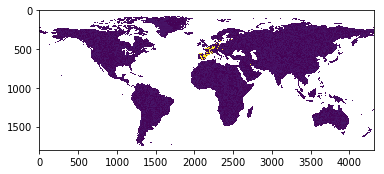

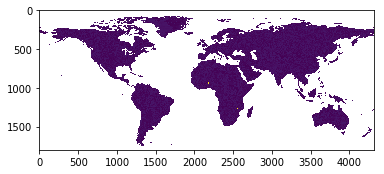

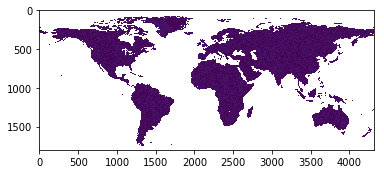

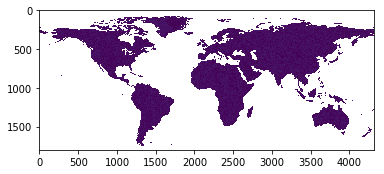

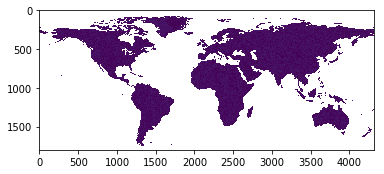

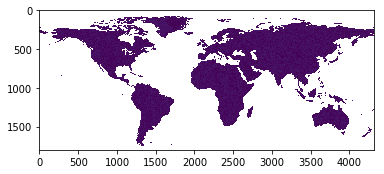

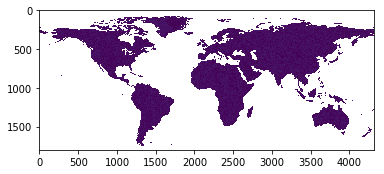

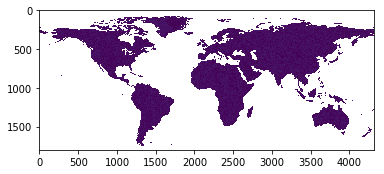

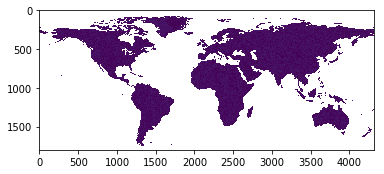

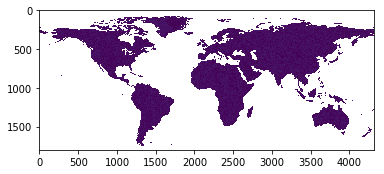

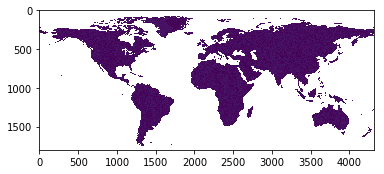

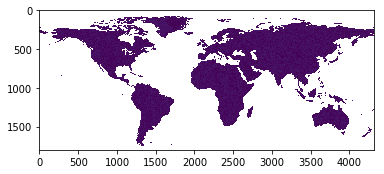

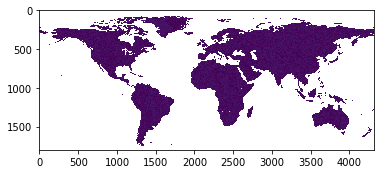

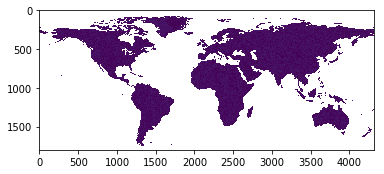

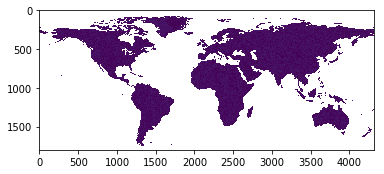

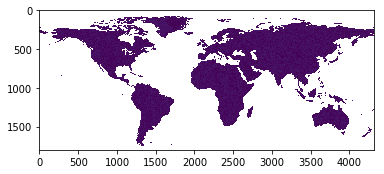

In [7]:
for key in species_occ_dict:
    new_band = band.copy()
    
    #lon_lat presence points
    presence_data = species_occ_dict[key]
    presence_data["present/pseudo_absent"]=1
    spec = key
    long=presence_data["decimal_longitude"]
    lati=presence_data["decimal_latitude"]
    long=pd.Series.tolist(long)
    lati=pd.Series.tolist(lati)

    #set raster cell mask values of presence locations to 1
    for i in range(0,len(presence_data)):
        row,col=src.index(long[i],lati[i])
        new_band[row,col]=100
        
    rasterio.plot.show(new_band)
    # Register GDAL format drivers and configuration options with a
    # context manager.
    #with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source


    with rasterio.open(file_dir+'/data/GIS/spec_presence/%s_presence_map.tif'%spec, 'w', **profile) as dst:
        dst.write(new_band.astype(rasterio.float32), 1)

In [11]:
####stacking them into a single raster
#species presence dataset
#create list of raster file locations and a list containing only the names of each raster
list_species_files=[]
names_species=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/spec_presence"):
    for file in files:
        if file.endswith('.tif') and "stacked" not in file:
            list_species_files.append(file_dir+"/data/GIS/spec_presence/"+file)
            name=file.replace(".tif","")
            names_species.append(name)
print(names_species)
#es.stack(list_species_files, file_dir+"/data/GIS/spec_presence/species_presence_stacked.tif")

['Aepyceros_melampus_presence_map', 'Alcelaphus_buselaphus_presence_map', 'Alces_alces_presence_map', 'Antidorcas_marsupialis_presence_map', 'Antilocapra_americana_presence_map', 'Antilope_cervicapra_presence_map', 'Axis_axis_presence_map', 'Axis_porcinus_presence_map', 'Bison_bison_presence_map', 'Bison_bonasus_presence_map', 'Blastocerus_dichotomus_presence_map', 'Boselaphus_tragocamelus_presence_map', 'Bos_javanicus_presence_map', 'Capra_ibex_presence_map', 'Capra_nubiana_presence_map', 'Capra_pyrenaica_presence_map', 'Capra_sibirica_presence_map', 'Capreolus_capreolus_presence_map', 'Capreolus_pygargus_presence_map', 'Capricornis_crispus_presence_map', 'Capricornis_swinhoei_presence_map', 'Catagonus_wagneri_presence_map', 'Cephalophus_dorsalis_presence_map', 'Cephalophus_jentinki_presence_map', 'Cephalophus_natalensis_presence_map', 'Cephalophus_niger_presence_map', 'Cephalophus_nigrifrons_presence_map', 'Cephalophus_rufilatus_presence_map', 'Cephalophus_silvicultor_presence_map', 

In [ ]:

print(len(list_raster_locations))
stacked=rasterio.open(file_dir+"/data/GIS/spec_presence/species_presence_stacked.tif")

for i in range(1,len(list_raster_locations)):
    band = stacked.read(i,masked=True)
    plt.imshow(band,interpolation="none")
    plt.show()

#### Part 5. Stack into single raster file

In [15]:
#Stack ENVIREM+BIOCLIM+HISTORIC+SPECIES dataset
list_variables=[]
list_names=[]
for item in list_bioclim_files:
    list_variables.append(item)   
for item in list_envirem_files:
    list_variables.append(item)
for item in list_historic_files:
    list_variables.append(item)
for item in list_species_files:
    list_variables.append(item)
    
es.stack(list_variables, file_dir+"/data/GIS/env_stacked/stacked_env_variables.tif")

for item in names_bioclim:
    list_names.append(item)   
for item in names_envirem:
    list_names.append(item)
for item in names_historic:
    list_names.append(item)
for item in names_species:
    list_names.append(item)
list_names

['bio1',
 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'bio8',
 'bio9',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio18',
 'bio19',
 'Aspect_5deg',
 'BulkDensity_5min',
 'ClayPercentage_5min',
 'current_5arcmin_annualPET',
 'current_5arcmin_aridityIndexThornthwaite',
 'current_5arcmin_climaticMoistureIndex',
 'current_5arcmin_continentality',
 'current_5arcmin_embergerQ',
 'current_5arcmin_growingDegDays0',
 'current_5arcmin_growingDegDays5',
 'current_5arcmin_maxTempColdest',
 'current_5arcmin_minTempWarmest',
 'current_5arcmin_monthCountByTemp10',
 'current_5arcmin_PETColdestQuarter',
 'current_5arcmin_PETDriestQuarter',
 'current_5arcmin_PETseasonality',
 'current_5arcmin_PETWarmestQuarter',
 'current_5arcmin_PETWettestQuarter',
 'current_5arcmin_thermicityIndex',
 'OrganicCarbon_5min',
 'PhCaCL_5min',
 'Slope_5deg',
 'AboveGroundBiomass_1',
 'AboveGroundBiomass_10',
 'AboveGroundBiomass_11',
 'AboveGroundBiomass_12',
 'AboveGroundBio

In [13]:
###create dataset to predict on

 ###Dataset of world map including all locations with data-values (to later predict presence-pseudoabsence on)
    src=rasterio.open(file_dir+'/data/GIS/env_stacked/stacked_env_variables.tif')
    array=src.read_masks(1)
    
    r = gdal.Open(file_dir+'/data/GIS/env_stacked/stacked_env_variables.tif')
    (y_index, x_index) = np.nonzero(array > 0)
    (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = r.GetGeoTransform()
    x_coords = x_index * x_size + upper_left_x + (x_size / 2) #add half the cell size
    y_coords = y_index * y_size + upper_left_y + (y_size / 2) #to centre the point

    lon_lat_array=np.stack((x_coords,y_coords)).T

    lon=[]
    lat=[]

    for item in lon_lat_array:
        longitude=item[0]
        latitude=item[1]
        lon.append(longitude)
        lat.append(latitude)

    taxon=["%s"%spec]*len(lon)

    data_to_pred=pd.DataFrame({"decimal_longitude":lon,"decimal_latitude":lat})
    print(len(data_to_pred), "number of points to predict")
    data_to_pred.to_csv(file_dir + "/data/GIS/world_locations_to_predict2.csv")
    


2287025 number of points to predict


In [ ]:
###extract raster values at world locations to predict
data=pd.read_csv(file_dir + "/data/GIS/world_locations_to_predict.csv")
src = rasterio.open(file_dir+'/data/GIS/env_stacked/stacked_env_variables.tif')

lon = data["decimal_longitude"]
lat = data["decimal_latitude"]
lat = pd.Series.tolist(lat)
lon = pd.Series.tolist(lon)

for i in range(1, 348):
    array = src.read(i)
    band_name = list_names[i]
    data[band_name] = None
    print("processing band %s" % i)
    for j in range(0, len(data)):
        # What is the corresponding row and column in our image?
        row, col = src.index(lon[j], lat[j])  # spatial --> image coordinates
        # print(f'row,col=\t\t({row},{col})')
        # What is the value?
        value = array[row, col]
        data[band_name][j] = value
data.to_csv(file_dir + "/data/GIS/world_env_dataframe.csv")






processing band 1


C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
